In [2]:
import math
import copy
import statistics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Height and Weight Dataset
https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

Original source: http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

Download and extract csv to `/data` folder.

In [3]:
df = pd.read_csv("../data/SOCR-HeightWeight.csv")

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
heights = (df["Height(Inches)"] * 2.54).to_numpy()
heights

array([167.0896074, 181.6486334, 176.2727996, ..., 164.334317 ,
       171.5241172, 174.9491294])

In [6]:
heights_lst = heights.tolist()
heights_lst[:5]

[167.0896074, 181.6486334, 176.2727996, 173.270164, 172.18103739999998]

In [7]:
num_pts = len(heights_lst)
print("Number of data points: {}".format(num_pts))

Number of data points: 25000


Reference: https://www.statology.org/descriptive-inferential-statistics/

# Descriptive Statistics
In a nutshell, descriptive statistics aims to describe a chunk of raw data using summary statistics, graphs, and tables.


There are three common forms of descriptive statistics:
## 1. Summary statistics. 
These are statistics that summarize the data using a single number.

## 2. Graphs. 
Graphs help us visualize data. Common types of graphs used to visualize data include boxplots, histograms, stem-and-leaf plots, and scatterplots.

## 3. Tables. 
Tables can help us understand how data is distributed. One common type of table is a frequency table, which tells us how many data values fall within certain ranges. 

<AxesSubplot:ylabel='Count'>

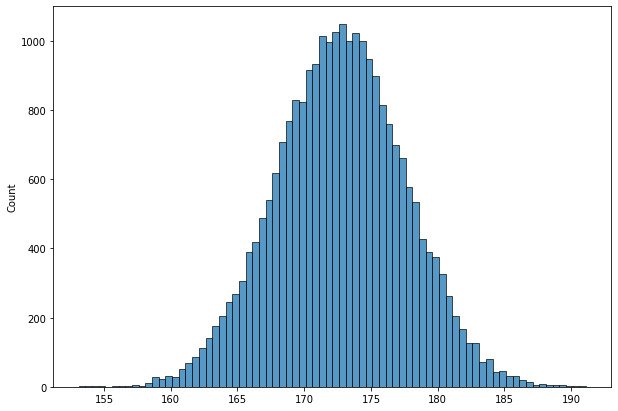

In [8]:
plt.figure(figsize=(10, 7))
hp = sns.histplot(heights, binwidth=0.5)
hp

As we can see, this data follow a normal distribution.

Let's calculate the mean, median, mode and other statistics from this data using plain python, using the statistics library and finally using numpy.

## Summary statistics
There are two types of summary statistics:
### 1. Measures of central tendency
These numbers describe the center of the dataset. Examples are mean, median and mode.

### 2. Measures of dispersion
These numbers indicate how spread out the values are within the data. Examples are variance and standard deviation.

In [9]:
from collections import Counter
from scipy import stats as st

### Measures of central tendency

In [10]:
# Mean
print("Mean: ")
# Pure Python
def calc_mean(data):
    return sum(data)/len(data)

mean = calc_mean(data=heights_lst)
print("\tUsing pure python: \t{}".format(mean))
# Statistics library
mean = statistics.mean(heights_lst)
print("\tUsing statistics: \t{}".format(mean))
# Numpy library
mean = np.mean(heights)
print("\tUsing numpy: \t\t{}".format(mean))

Mean: 
	Using pure python: 	172.70250853587314
	Using statistics: 	172.702508535872
	Using numpy: 		172.702508535872


In [11]:
# Median
print("Median: ")
# Pure Python
def calc_median(data_points):
    data_points.sort()
    len_data = len(data_points)
    if len_data % 2 == 0:
        mid = len_data//2 - 1
        # print("mid, mid+1 = {}, {}".format(mid + 1, mid + 2))
        # print(data_points[mid])
        return (data_points[mid] + data_points[mid + 1]) / 2
    else:
        mid = len_data//2
        # print("mid = {}".format(mid + 1))
        return data_points[mid]

median = calc_median(heights_lst)
print("\tUsing pure python: \t{}".format(median))
# Statistics library
median = statistics.median(heights_lst)
print("\tUsing statistics: \t{}".format(median))
# Numpy library
median = np.median(heights)
print("\tUsing numpy: \t\t{}".format(median))

Median: 
	Using pure python: 	172.709078
	Using statistics: 	172.709078
	Using numpy: 		172.709078


In [12]:
# Mode
print("Mode: ")
# Pure Python
def find_mode(data):
    counts = Counter(data)
    mode = counts.most_common(1)[0][0]
    return mode

mode = find_mode(data=heights_lst)
print("\tUsing pure python: \t{}".format(mode))
# Statistics library
mode = statistics.mode(heights_lst)
print("\tUsing statistics: \t{}".format(mode))
# Numpy library
# There's no native way to find mode in numpy, so we can either use the statistics module or scipy.stats
mode = st.mode(heights).mode[0]
print("\tUsing scipy.stats: \t{}".format(mode))

Mode: 
	Using pure python: 	166.7712184
	Using statistics: 	166.7712184
	Using scipy.stats: 	166.7712184


### Measures of dispersion

In [13]:
# Range
print("Range: ")
# Pure Python
def calc_range(data):
    max_v = max(data)
    min_v = min(data)
    n_range = max(heights_lst) - min(heights_lst)
    return min_v, max_v, n_range    

min_h, max_h, n_range = calc_range(data=heights_lst)
print("\tUsing pure python: \t{}".format(n_range))
# Numpy library
# There's no native way to find mode in numpy, so we can either use the statistics module or scipy.stats
n_range = np.max(heights) - np.min(heights)
print("\tUsing numpy: \t\t{}".format(n_range))

Range: 
	Using pure python: 	37.7810776
	Using numpy: 		37.7810776


In [14]:
# Interquartile Range
print("Interquartile Range: ")
# Pure Python
def find_median_points(data):
    len_data = len(data)
    if len_data % 2 == 0:
        mid = len_data//2 - 1
        return "even", mid, mid + 1
    else:
        mid = len_data//2
        return "odd", mid, None

def calc_quartile_range(data):
    data_cpy = copy.deepcopy(data)
    odd_even, idx1, idx2 = find_median_points(data_cpy)
    median = calc_median(data_cpy)
    lower_values = data_cpy[:idx1]
    upper_values = data_cpy[idx1 + 1:]
    q1 = calc_median(lower_values)
    q3 = calc_median(upper_values)
    return q1, median, q3


q1, q2, q3 = calc_quartile_range(data=heights_lst)
print("\tUsing pure python: \t{}, {}, {}".format(q1, q2, q3))
# Statistics library
quantiles = statistics.quantiles(heights_lst)
print("\tUsing statistics: \t{}, {}, {}".format(quantiles[0], quantiles[1], quantiles[2]))
# Numpy library
q1 = np.quantile(heights, 0.25)
q2 = np.quantile(heights, 0.5)
q3 = np.quantile(heights, 0.75)
print("\tUsing numpy: \t\t{}, {}, {}".format(q1, q2, q3))

Interquartile Range: 
	Using pure python: 	169.4289982, 172.709078, 175.95335649999998
	Using statistics: 	169.42905535, 172.709078, 175.95340095
	Using numpy: 		169.42916965, 172.709078, 175.95331205


### Variance
Variance is defined as (denoted as $\sigma^2$): 

$\sigma^{2} = \frac{1}{N}\sum{(x_i – \mu)^{2}}$

where $\mu$ is the population mean, $x_i$ is the $i^{th}$ element from the population, $N$ is the population size, and $\sum$ is just a fancy symbol that means “sum.”


In [16]:
# Variance
print("Variance: ")
# Pure Python
def calc_variance(data):
    mean = calc_mean(data)
    differences = [x - mean for x in data]
    variance = sum([x**2 for x in differences])/len(data)
    return variance

variance = calc_variance(data=heights_lst)
print("\tUsing pure python: \t{}".format(variance))
# Statistics library
variance = statistics.variance(heights_lst)
print("\tUsing statistics: \t{}".format(variance))
# Numpy library
variance = np.var(heights)
print("\tUsing numpy: \t\t{}".format(variance))

Variance: 
	Using pure python: 	23.330517813504205
	Using statistics: 	23.33145107154699
	Using numpy: 		23.33051781350413


### Standard Deviation
The formula to find the standard deviation of a population (denoted as $\sigma$ ) is:

$\sigma = \sqrt{\frac{1}{N}\sum{(x_i – \mu)^{2}}}$

In [17]:
# Standard Deviation
print("Standard Deviation: ")
# Pure Python
def calc_standard_deviation(data):
    variance = calc_variance(data)
    st_dev = math.sqrt(variance)
    return st_dev

stdv = calc_standard_deviation(data=heights_lst)
print("\tUsing pure python: \t{}".format(stdv))
# Statistics library
stdv = statistics.stdev(heights_lst)
print("\tUsing statistics: \t{}".format(stdv))
# Numpy library
stdv = np.std(heights)
print("\tUsing numpy: \t\t{}".format(stdv))

Standard Deviation: 
	Using pure python: 	4.830167472614609
	Using statistics: 	4.830264078862251
	Using numpy: 		4.830167472614602


# Inferential Statistics
In a nutshell, inferential statistics uses a small sample of data to draw inferences about the larger population that the sample came from.

## Hypothesis testing
A statistical hypothesis is an assumption about a population parameter.

Let's assume that the mean height of a human (male or female) is 5'6".

The assumption about the height is the statistical hypothesis and the true mean height of humans is the population parameter.

In [25]:
height_assumption = 5 * 12 + 6 # in inches
height_assumption = height_assumption * 2.54
true_mean = calc_mean(heights_lst)
print("Statistical Hypothesis: {} \n&\nPopulation parameter: \t{}".format(height_assumption, true_mean))

Statistical Hypothesis: 167.64000000000001 
&
Population parameter: 	172.70250853587117


So, we were close enough, but suppose this was good educated guess for height in a given sample, but we found say people on mars to be on average 5 inches taller, we might have a reason to explore the data to try to find correlations and potentially infer causes for the difference.

Hypothesis testing allows us to find interesting results and tendencies.

There are two types of statistical hypotheses:

### Null Hypothesis
The null hypothesis, denoted as $H_0$, is the hypothesis that the sample data occurs purely from chance.

### Alternative hypothesis
The alternative hypothesis, denoted as $H_1$ or $H_a$, is the hypothesis that the sample data is influenced by some non-random cause.